In [11]:
import matplotlib.pyplot as plt
import ds_functions as ds
import pandas as pd
from pandas.plotting import register_matplotlib_converters
import seaborn as sns
import scipy.stats as _stats
import numpy as np
import config as cfg

register_matplotlib_converters()

# Heart Failure Dataset

In [2]:
data = pd.read_csv('data/heart_failure_clinical_records_dataset.csv')

## Dimensionality

In [3]:
data

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


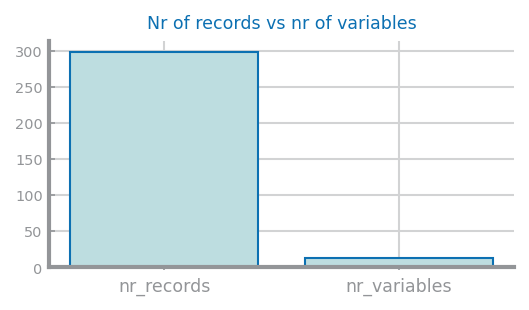

In [4]:
plt.figure(figsize=(4,2))
values = { 'nr_records': data.shape[0], 'nr_variables': data.shape[1]}
ds.bar_chart(values.keys(), values.values(), title='Nr of records vs nr of variables')

In [5]:
data.dtypes

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

In [6]:
data['sex'] = data['sex'].astype('category')
for c in ['anaemia', 'diabetes', 'high_blood_pressure', 'smoking', 'DEATH_EVENT']:
    data[c] = data[c].astype('bool')

data.dtypes

age                          float64
anaemia                         bool
creatinine_phosphokinase       int64
diabetes                        bool
ejection_fraction              int64
high_blood_pressure             bool
platelets                    float64
serum_creatinine             float64
serum_sodium                   int64
sex                         category
smoking                         bool
time                           int64
DEATH_EVENT                     bool
dtype: object

dict_values([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

<Figure size 600x450 with 0 Axes>

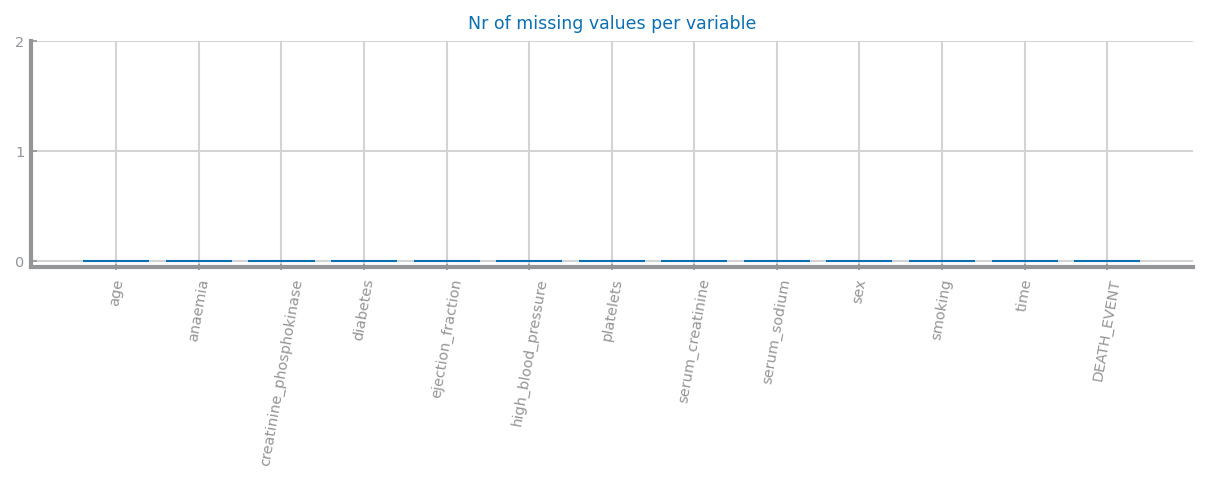

In [7]:
plt.figure()
mv = {var: data[var].isna().sum() for var in data}
plt.figure(figsize=(10, 2))
plt.bar(mv.keys(), mv.values(), edgecolor=cfg.LINE_COLOR, color=cfg.FILL_COLOR)
plt.title('Nr of missing values per variable')
plt.yticks([0, 1, 2])
plt.xticks(rotation=80)

mv.values()

## Granularity

## Distribution

In [13]:
data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


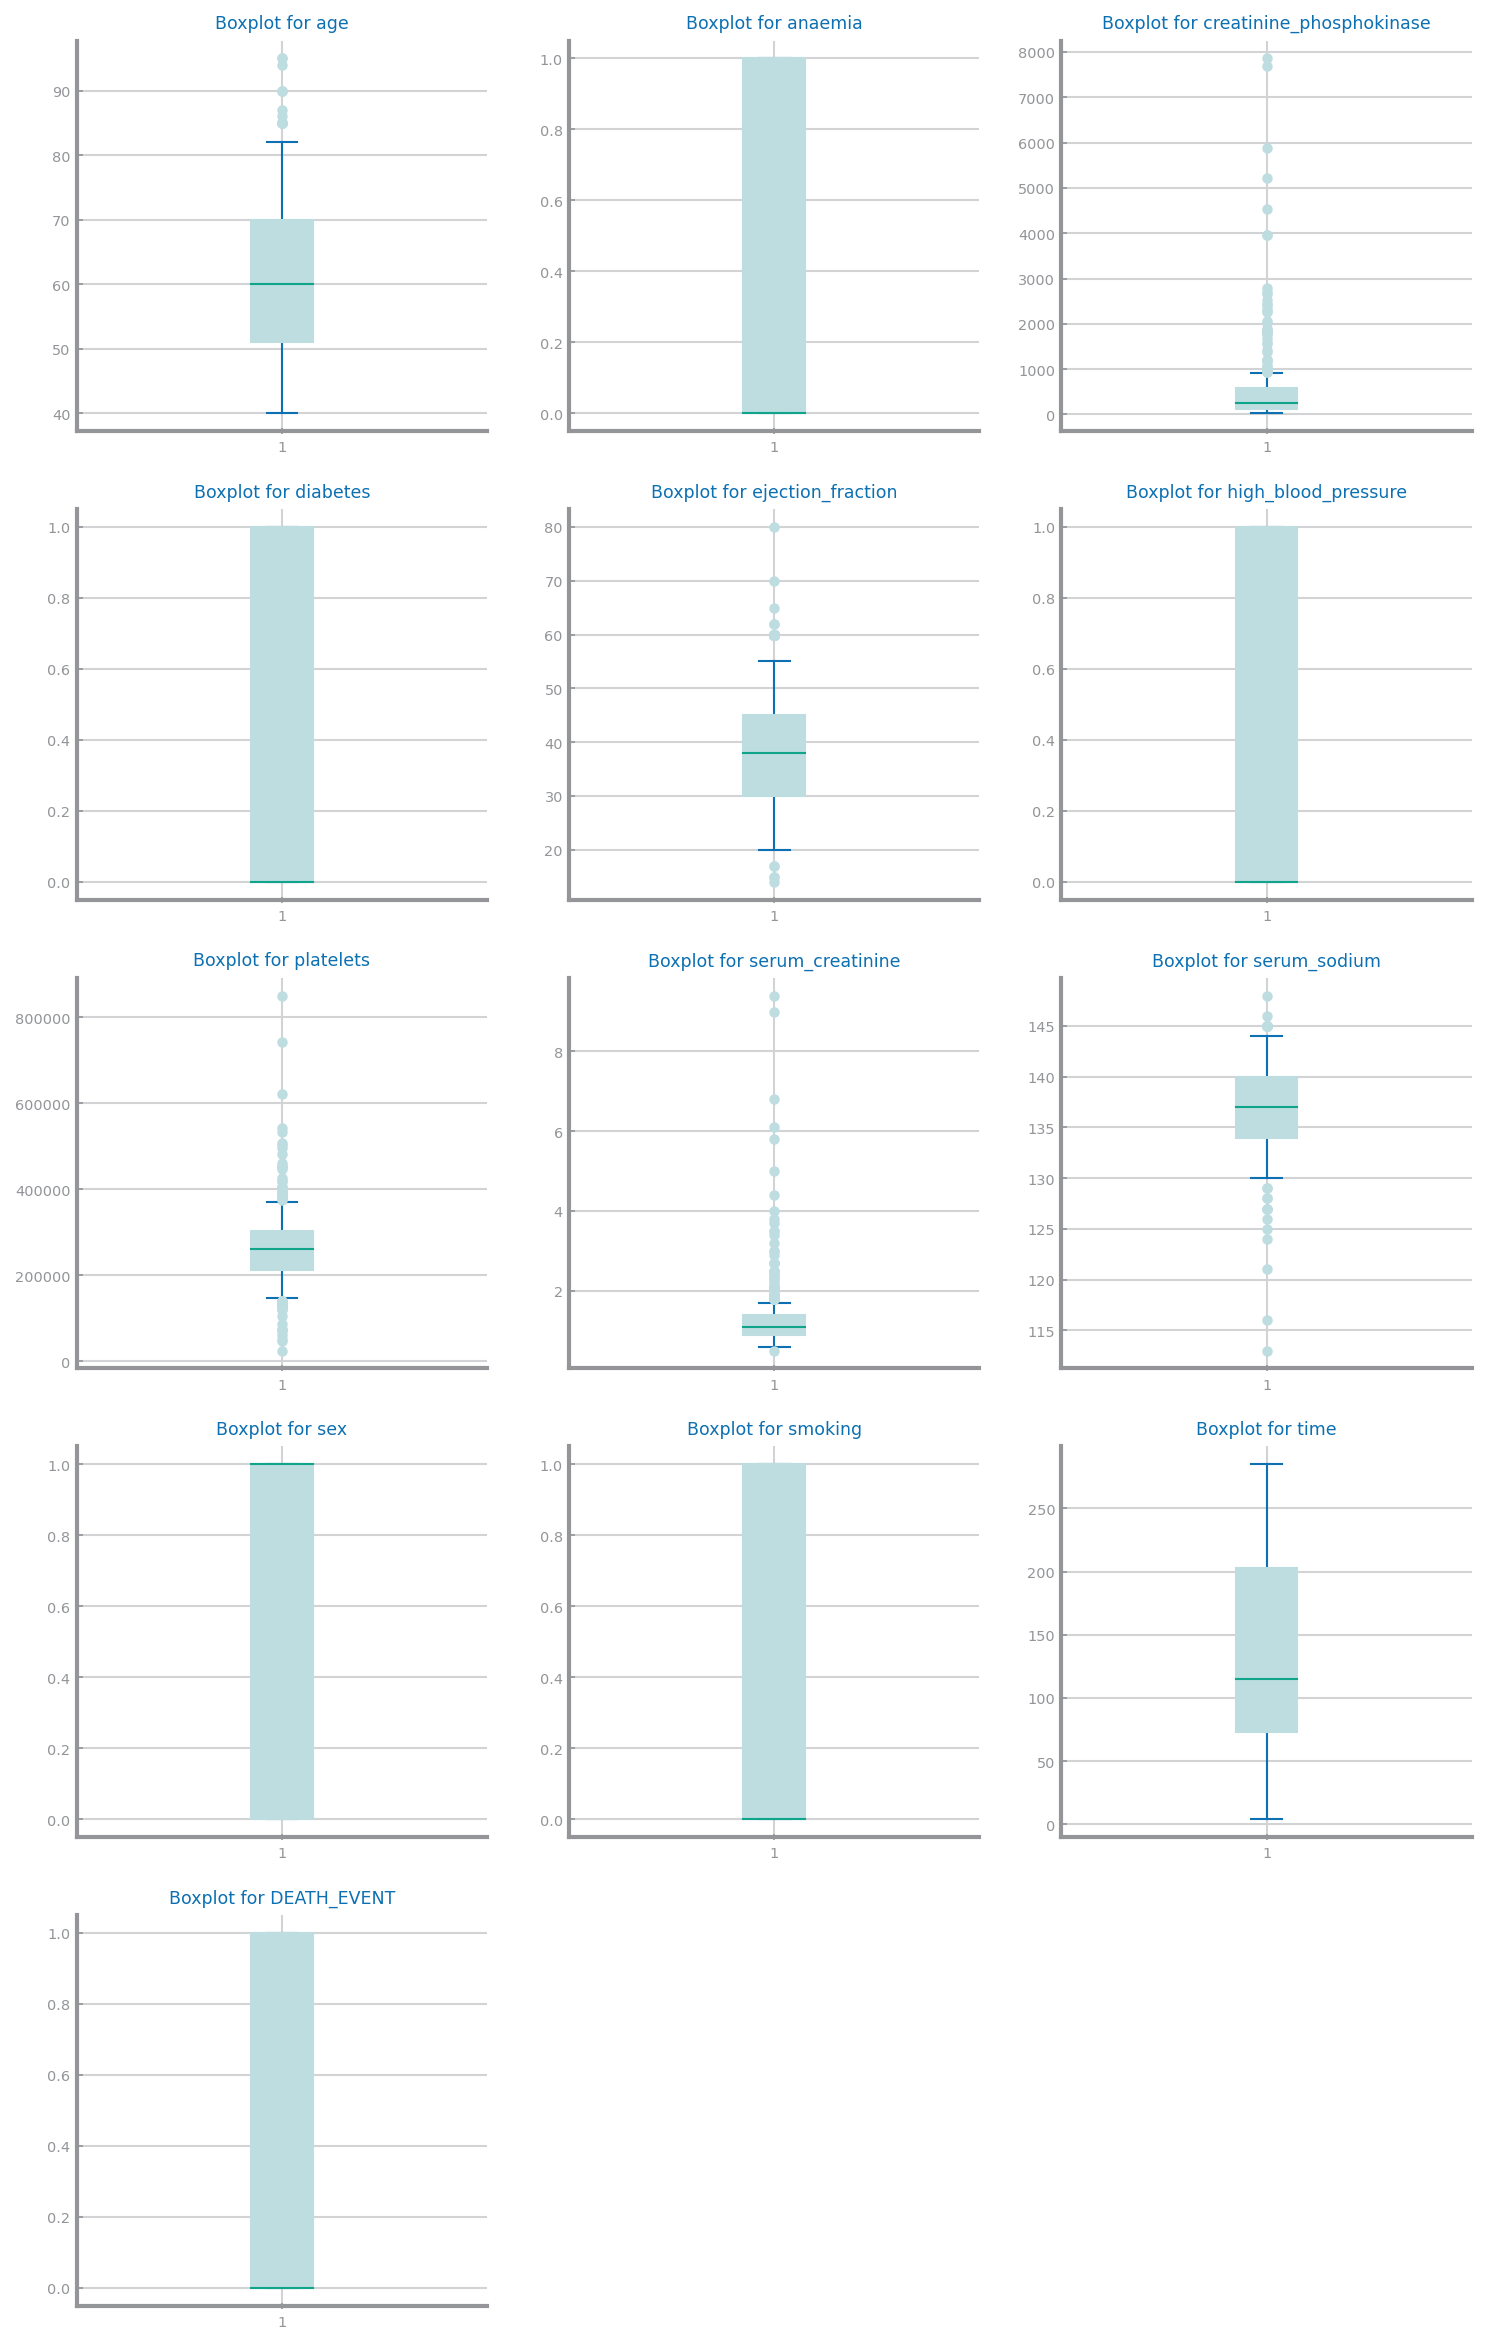

In [14]:
numeric_vars = data.select_dtypes(include='number').columns
rows, cols = ds.choose_grid(len(numeric_vars))
fig, axs = plt.subplots(rows, cols, figsize=(cols*ds.HEIGHT, rows*ds.HEIGHT))
i, j = 0, 0
for n in range(len(numeric_vars)):
    axs[i, j].set_title('Boxplot for %s'%numeric_vars[n])
    axs[i, j].boxplot(data[numeric_vars[n]].dropna().values)
    i, j = (i + 1, 0) if (n+1) % cols == 0 else (i, j + 1)

while n <= data.shape[1]:
    axs[i, j].axis('off')
    n = n + 1
    i, j = (i + 1, 0) if n % cols == 0 else (i, j + 1)

plt.show()

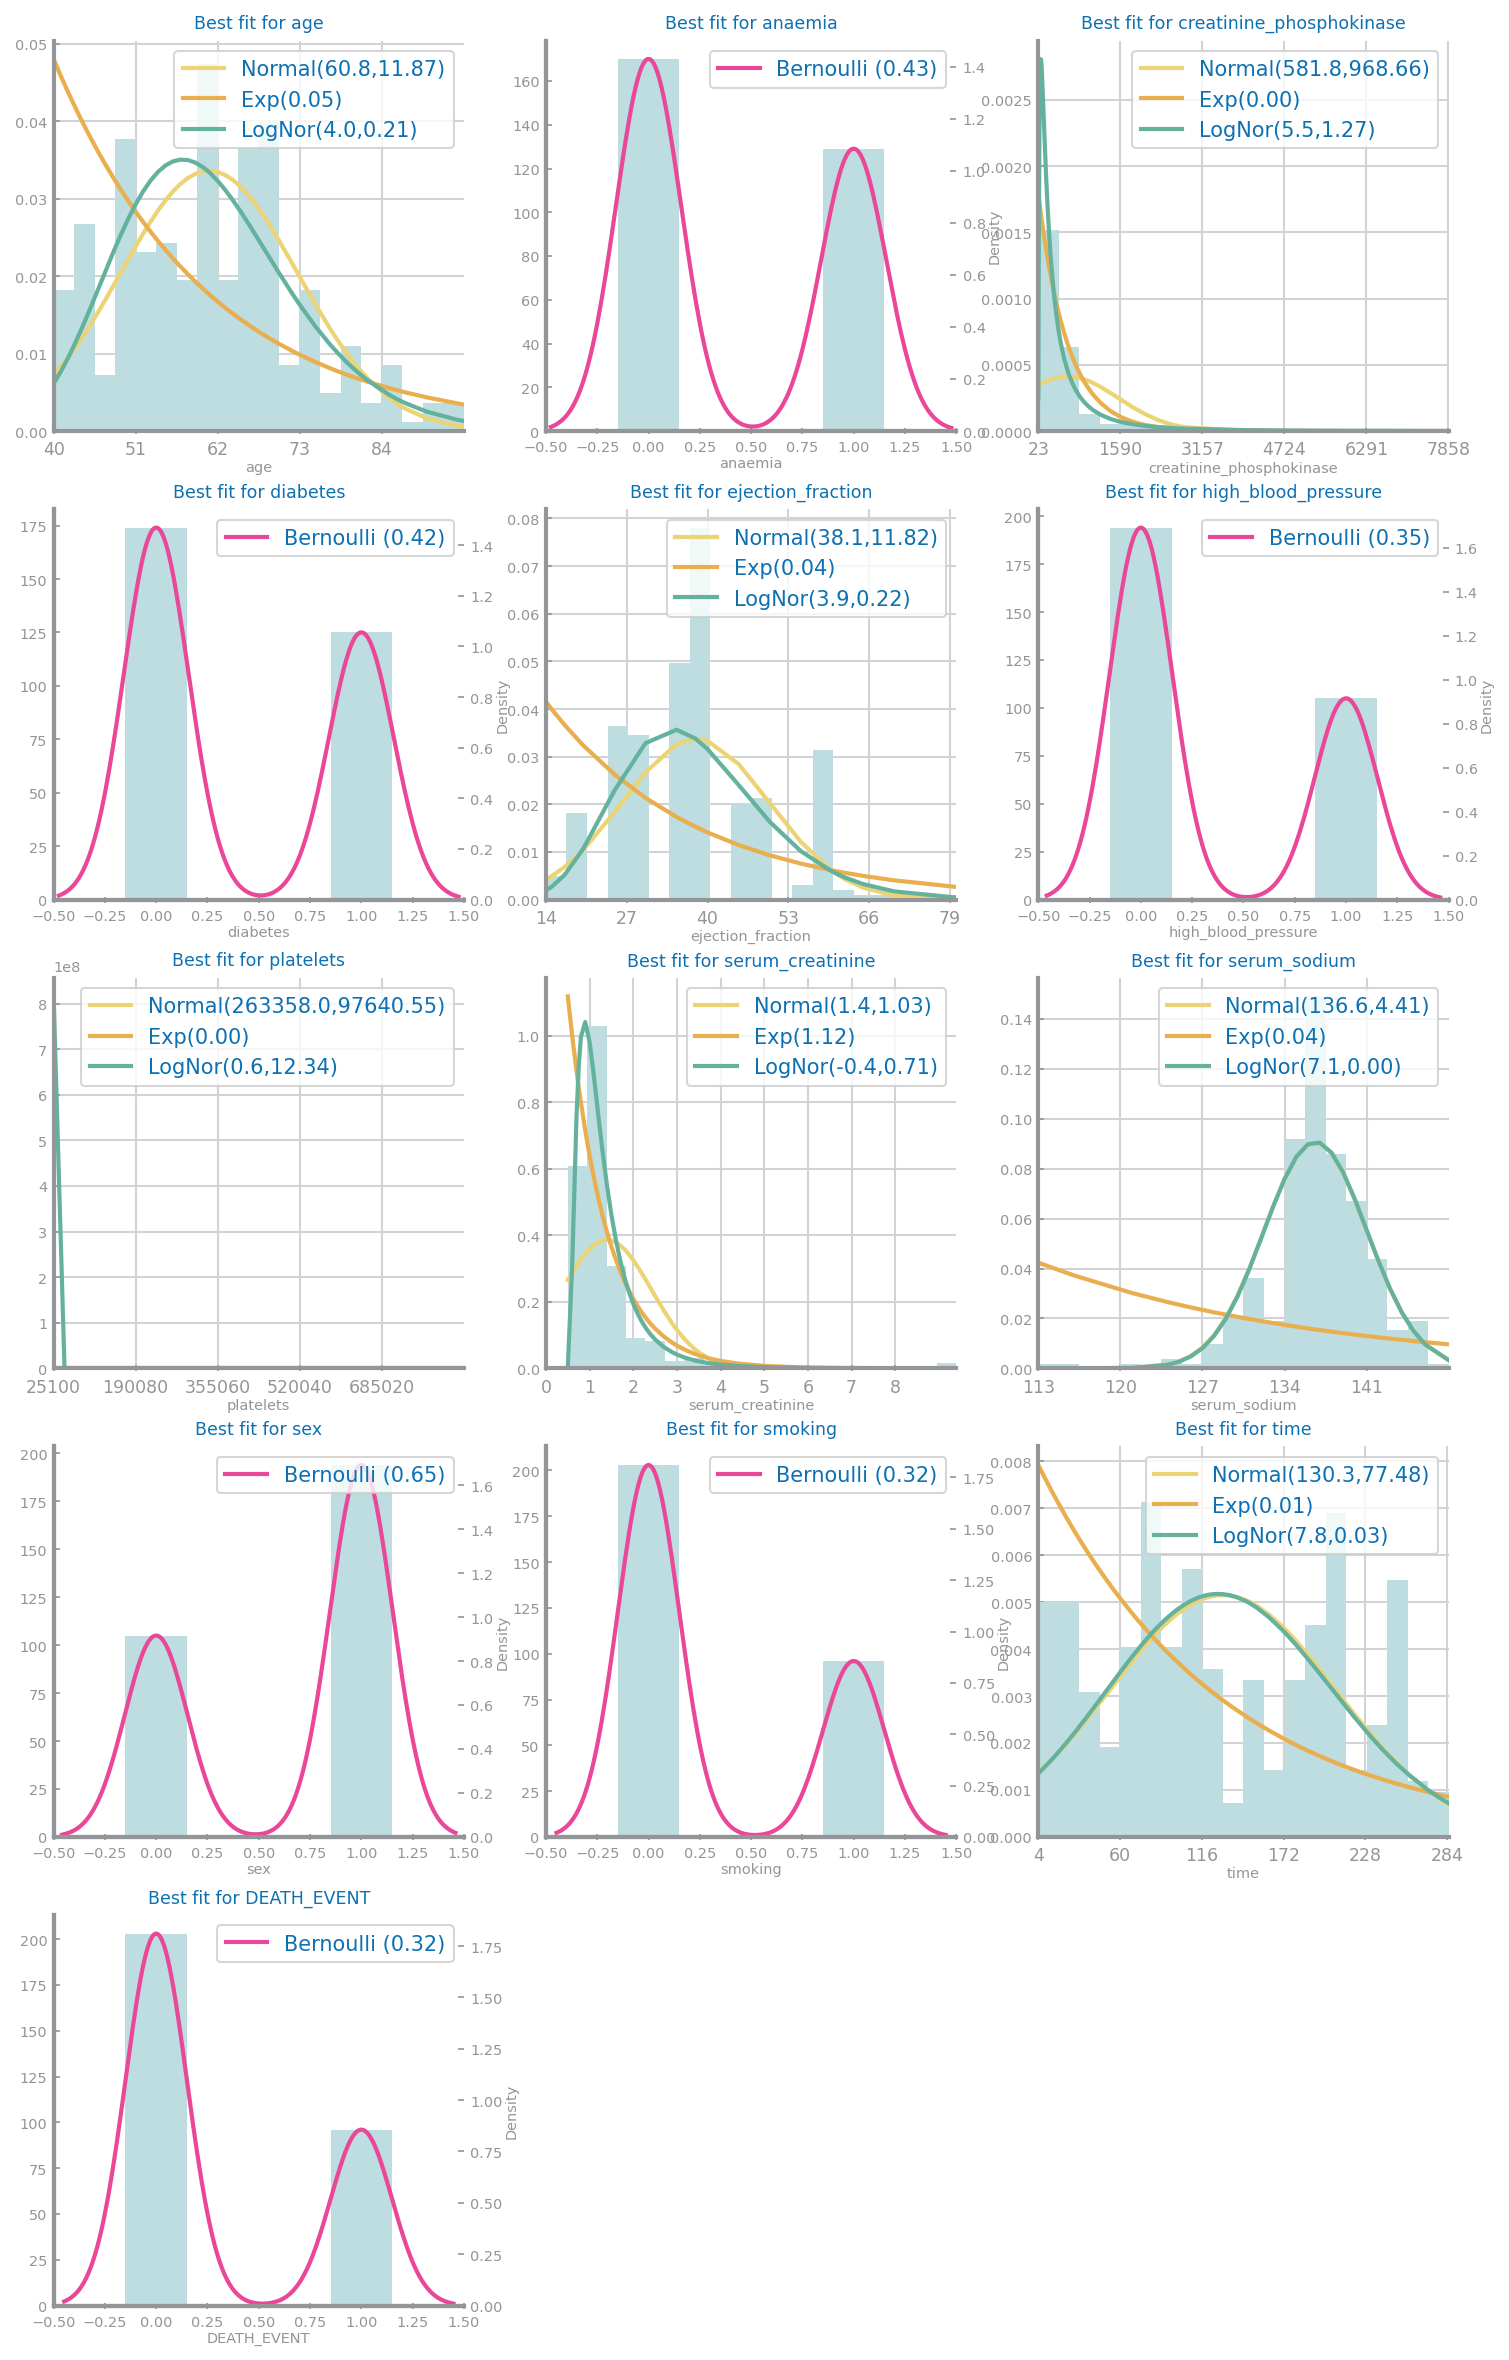

In [47]:
fig, axs = plt.subplots(rows, cols, figsize=(cols*ds.HEIGHT, rows*ds.HEIGHT))
i, j = 0, 0
#len(numeric_vars)
for n in range(len(numeric_vars)):
    new_data = data[numeric_vars[n]].dropna()
    
    if np.array_equal(new_data.values, new_data.astype(bool)):
        axs[i, j].hist(new_data.values, rwidth=0.3, bins=[-0.5, 0.5, 1.5])
        # Set customize plot
        axs[i, j].set_title('Best fit for %s'%numeric_vars[n])
        axs[i, j].set_xlabel(numeric_vars[n])
        axs[i, j].set_xlim(-0.5, 1.5)
        axs[i, j].grid(False)
        
        # Create second axis for Bernoulli distribution
        ax2 = axs[i, j].twinx()
        ax2.grid(False)
        sns.kdeplot(data=new_data, ax=ax2, color=cfg.my_palette['pink'])
        p = np.count_nonzero(new_data.values == 1) / len(new_data.values)
        ax2.legend(["Bernoulli (%.2f)" %p], loc="upper right")
    else:
        ds.histogram_with_distributions(axs[i, j], new_data, numeric_vars[n])

        # Fix plot ticks
        min = int(new_data.min())
        max = int(new_data.max())
        interval = int((max - min) / 5)
        axs[i, j].set_xticks(list(range(min, max, interval)))
        #FIXME
        axs[i, j].set_xticklabels(list(range(min, max, interval)))
    
    i, j = (i + 1, 0) if (n+1) % cols == 0 else (i, j + 1)

while n <= data.shape[1]:
    axs[i, j].axis('off')
    n = n + 1
    i, j = (i + 1, 0) if n % cols == 0 else (i, j + 1)

plt.show()

# Toxicity Dataset

In [8]:
data = pd.read_csv('data/qsar_oral_toxicity.csv', sep=';', header=None)

## Dimensionality

In [9]:
data

,0,1,2,3,4,5,6,7,8,9,...,1015,1016,1017,1018,1019,1020,1021,1022,1023,1024
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,negative
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,negative
2,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,negative
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,negative
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8987,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,negative
8988,0,1,0,0,0,1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,negative
8989,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,negative
8990,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,negative


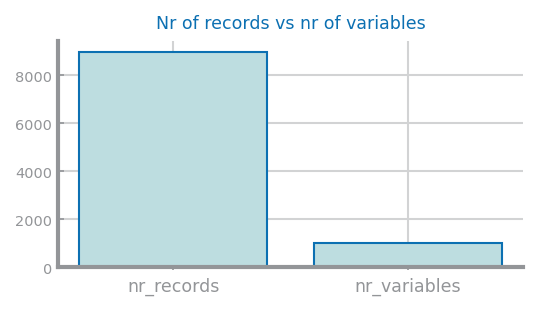

In [10]:
plt.figure(figsize=(4,2))
values = { 'nr_records': data.shape[0], 'nr_variables': data.shape[1]}
ds.bar_chart(values.keys(), values.values(), title='Nr of records vs nr of variables')

In [11]:
data.dtypes

0        int64
1        int64
2        int64
3        int64
4        int64
         ...  
1020     int64
1021     int64
1022     int64
1023     int64
1024    object
Length: 1025, dtype: object

In [12]:
## Should we?
for c in data.columns:
    data[c] = data[c].astype('bool')
data.rename(columns={1024: 'toxic'}, inplace=True)
data.dtypes

0        bool
1        bool
2        bool
3        bool
4        bool
         ... 
1020     bool
1021     bool
1022     bool
1023     bool
toxic    bool
Length: 1025, dtype: object

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149,
  150,
  151,
  152,
  153,
  154,
  155,
  156,
  157,
  15

<Figure size 600x450 with 0 Axes>

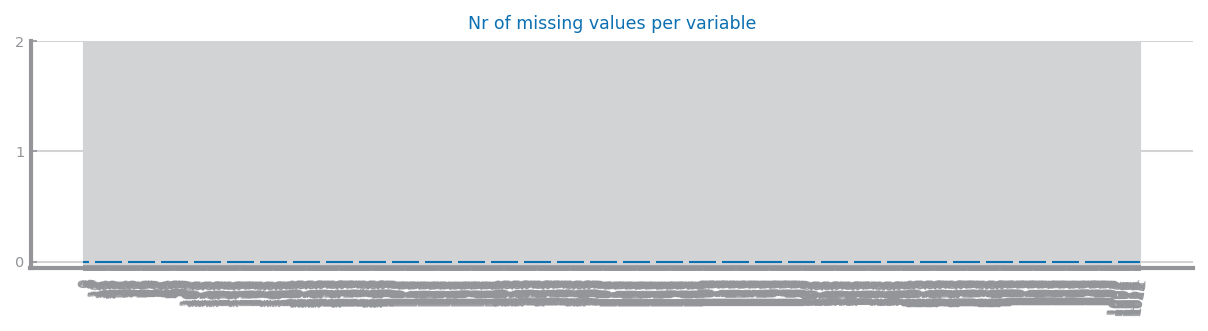

In [16]:
plt.figure()
mv = {str(var): data[var].isna().sum() for var in data}
plt.figure(figsize=(10, 2))
plt.bar(mv.keys(), mv.values(), edgecolor=cfg.LINE_COLOR, color=cfg.FILL_COLOR)
plt.title('Nr of missing values per variable')
plt.yticks([0, 1, 2])
plt.xticks(rotation=80)

## Granularity

## Distribution